<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas

O ponto de partida de qualquer análise em Python é a importação das bibliotecas. O código carrega o "canivete suíço" da ciência de dados: pandas para a manipulação de tabelas (DataFrames) , numpy para operações numéricas eficientes , matplotlib e seaborn para a visualização gráfica, e sklearn para ferramentas de aprendizado de máquina.

In [124]:
# Manipulação de Sistema e Arquivos
import os
import threading
import random

# Processamento de Dados e Matemática
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Machine Learning e Estatística
from sklearn.decomposition import PCA

## 2. Leitura do Arquivo CSV

Imediatamente após a importação das bibliotecas, ocorre a leitura do arquivo CSV. O comando pd.read_csv  carrega os dados brutos para a memória, armazenando-os na variável df. A contagem de linhas (len(df)) revela a escala do problema: um conjunto de 17.378 estrelas, informação crucial para o planejamento computacional.



In [125]:
# Carregamos oS arquivoS CSV em DataFrames do Pandas de forma individualizada.

# MAGNITUDE
df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')
df_err = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/ERR_Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# FLUXO
df_flux = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/FLUX_APER_COR_3_0.csv')
df_err_flux = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/FLUX_RELERR_APER_COR_3_0.csv')


# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
numero_estrelas_err = len(df_err)
numero_estrelas_flux = len(df_flux)
numero_estrelas_err_flux = len(df_err_flux)


print(f"O número total de estrelas (MAGNITUDE) é: {numero_estrelas}")
print(f"O número total de estrelas (ERRO MAGNITUDE) é: {numero_estrelas_err}")
print(f"O número total de estrelas (FLUXO) é: {numero_estrelas_flux}")
print(f"O número total de estrelas (ERRO FLUXO) é: {numero_estrelas_err_flux}")

O número total de estrelas (MAGNITUDE) é: 17378
O número total de estrelas (ERRO MAGNITUDE) é: 17360
O número total de estrelas (FLUXO) é: 27032
O número total de estrelas (ERRO FLUXO) é: 27032


## 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos. Já o dataframe que possui `TILE_ID`, `NUMBER`, `MAG_ERR_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe` é relacionado ao Vetor de erro para magnitude.

In [126]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


Antes de modificar qualquer dado, é vital inspecioná-lo. Inicialmente realiza-se a visualização das primeiras linhas com df.head(). Esta é uma etapa diagnóstica essencial. A saída revela imediatamente o primeiro desafio de pré-processamento: as colunas MAG_APER_COR_3_0 e MAG_ERR_APER_COR_3_0 não são um valor único, mas sim uma string de texto contendo dezenas de valores de magnitude separados por espaços, o primeirosão os valores propriamente dito das agnitudes e o segundo é o erro por cada uma delas.

In [127]:
#Exibimos as primeiras linhas do DataFrame dos erros para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584


In [128]:
#Exibimos as primeiras linhas do DataFrame (FLUXO) para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_flux.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,FLUX_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,582.97656 601.3763 678.82666 1383.5822 2058.70...,1.2200,0.1069,8.762295
1,9654,2,45190.008 46248.64 50623.14 104671.91 150363.9...,0.5789,0.0127,2.193816
2,9654,7,9898.973 26180.986 32765.014 41903.01 41733.52...,0.0947,0.0181,19.112989
3,9654,10,8215.598 11258.105 11986.251 20894.367 26783.6...,1.2176,0.0145,1.190867
4,9654,11,298.2201 322.17673 377.74734 633.40826 931.354...,1.9435,0.0366,1.883200


In [129]:
#Exibimos as primeiras linhas do DataFrame (ERROS FLUXO) para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err_flux.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,FLUX_RELERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.045776 0.043762 0.025101 0.013893 0.013901 0...,1.2200,0.1069,8.762295
1,9654,2,0.002365 0.002163 0.002184 0.000946 0.002373 0...,0.5789,0.0127,2.193816
2,9654,7,0.005432 0.002943 0.003006 0.001644 0.004314 0...,0.0947,0.0181,19.112989
3,9654,10,0.005947 0.004543 0.004993 0.002329 0.005363 0...,1.2176,0.0145,1.190867
4,9654,11,0.071899 0.048828 0.041199 0.018341 0.05658 0....,1.9435,0.0366,1.883200


## 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [130]:
# 1. PROCESSAMENTO SEPARADO PARA CADA DATAFRAME

# Para df (magnitude)
colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err (erros magnitude)
colunas_err_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_flux (fluxo)
colunas_flux_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err_flux (erros fluxo relativo)
colunas_err_flux_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [131]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [132]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_ERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [133]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_flux.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'FLUX_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [134]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err_flux.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'FLUX_RELERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [135]:
# Dividimos as colunas `MAG_APER_COR_3_0`, 'MAG_ERR_APER_COR_3_0' 'FLUX_APER_COR_3_0' e 'FLUX_RELERR_APER_COR_3_0'  em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)
df_err[colunas_err_fotometria] = df_err['MAG_ERR_APER_COR_3_0'].str.split(expand=True)
df_flux[colunas_flux_fotometria] = df_flux['FLUX_APER_COR_3_0'].str.split(expand=True)
df_err_flux[colunas_err_flux_fotometria] = df_err_flux['FLUX_RELERR_APER_COR_3_0'].str.split(expand=True)


In [136]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)
df_err[colunas_err_fotometria] = df_err[colunas_err_fotometria].apply(pd.to_numeric)
df_flux[colunas_flux_fotometria] = df_flux[colunas_flux_fotometria].apply(pd.to_numeric)
df_err_flux[colunas_err_flux_fotometria] = df_err_flux[colunas_err_flux_fotometria].apply(pd.to_numeric)

In [137]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [138]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de erro fotometria:")
df_err.head()


DataFrame após divisão da coluna de erro fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [139]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fluxo:")
df_flux.head()


DataFrame após divisão da coluna de fluxo:


,TILE_ID,NUMBER,FLUX_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,582.97656 601.3763 678.82666 1383.5822 2058.70...,1.2200,0.1069,8.762295,582.97656,601.37630,678.82666,1383.58220,...,20566.676,20333.865,21251.121,21295.955,22245.041,22310.191,22631.453,22888.590,23288.186,18576.174
1,9654,2,45190.008 46248.64 50623.14 104671.91 150363.9...,0.5789,0.0127,2.193816,45190.00800,46248.64000,50623.14000,104671.91000,...,0.000,0.000,989209.600,1228285.000,1107157.000,1279134.200,1288339.100,1144689.500,828633.600,983930.400
2,9654,7,9898.973 26180.986 32765.014 41903.01 41733.52...,0.0947,0.0181,19.112989,9898.97300,26180.98600,32765.01400,41903.01000,...,34871.500,34054.996,35259.060,35475.754,36413.420,37098.457,36611.320,37626.610,35465.640,37150.266
3,9654,10,8215.598 11258.105 11986.251 20894.367 26783.6...,1.2176,0.0145,1.190867,8215.59800,11258.10500,11986.25100,20894.36700,...,83362.330,81353.480,82237.230,83564.730,86451.130,87796.200,87199.420,86212.480,85311.600,82660.660
4,9654,11,298.2201 322.17673 377.74734 633.40826 931.354...,1.9435,0.0366,1.883200,298.22010,322.17673,377.74734,633.40826,...,0.000,0.000,23568.102,24514.723,25381.020,26193.334,26039.434,26509.547,27778.146,19332.701


In [140]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de erro_fluxo:")
df_err_flux.head()


DataFrame após divisão da coluna de erro_fluxo:


,TILE_ID,NUMBER,FLUX_RELERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.045776 0.043762 0.025101 0.013893 0.013901 0...,1.2200,0.1069,8.762295,0.045776,0.043762,0.025101,0.013893,...,0.002855,0.002707,0.002398,0.002344,0.002306,0.002663,0.002993,0.002691,0.002392,0.001165
1,9654,2,0.002365 0.002163 0.002184 0.000946 0.002373 0...,0.5789,0.0127,2.193816,0.002365,0.002163,0.002184,0.000946,...,0.000000,0.000000,0.000339,0.000614,0.000282,0.000502,0.000346,0.000275,0.000388,0.000150
2,9654,7,0.005432 0.002943 0.003006 0.001644 0.004314 0...,0.0947,0.0181,19.112989,0.005432,0.002943,0.003006,0.001644,...,0.001162,0.002485,0.001563,0.002760,0.002121,0.002605,0.003132,0.001561,0.002016,0.000769
3,9654,10,0.005947 0.004543 0.004993 0.002329 0.005363 0...,1.2176,0.0145,1.190867,0.005947,0.004543,0.004993,0.002329,...,0.000716,0.001524,0.000982,0.001685,0.001296,0.001578,0.001904,0.000984,0.001243,0.000568
4,9654,11,0.071899 0.048828 0.041199 0.018341 0.05658 0....,1.9435,0.0366,1.883200,0.071899,0.048828,0.041199,0.018341,...,0.000000,0.000000,0.002686,0.005013,0.002266,0.004311,0.002792,0.001965,0.002230,0.001497


In [141]:
# 2. RENOMEÇÃO PARA AMBOS OS DATAFRAMES (Renomear as bandas fotométricas)

# Carregar o arquivo CSV com os nomes das bandas
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/filters_names.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Verificar se temos 57 nomes de banda (para corresponder às 57 colunas de fotometria)
if len(filter_names) == 57:
    # Criar um dicionário para mapear os nomes antigos para os novos
    rename_dict = {f'Fotometria_{i+1}': filter_names[i] for i in range(57)}

    # Renomear as colunas no DataFrame principal
    df = df.rename(columns=rename_dict)
    df_err = df_err.rename(columns=rename_dict)
    df_flux = df_flux.rename(columns=rename_dict)
    df_err_flux = df_err_flux.rename(columns=rename_dict)

    print("Bandas fotométricas renomeadas com sucesso!")
else:
    print(f"Atenção: Número de bandas ({len(filter_names)}) não corresponde ao número de colunas de fotometria (57)")

Bandas fotométricas renomeadas com sucesso!


In [142]:
# 3. REMOVER COLUNAS ORIGINAIS
df = df.drop(['MAG_APER_COR_3_0'], axis=1)
df_err = df_err.drop(['MAG_ERR_APER_COR_3_0'], axis=1)
df_flux = df_flux.drop(['FLUX_APER_COR_3_0'], axis=1)
df_err_flux = df_err_flux.drop(['FLUX_RELERR_APER_COR_3_0'], axis=1)

print("Colunas originais removidas com sucesso!")

Colunas originais removidas com sucesso!


In [143]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,18.116,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,14.849,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,15.330,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,15.814,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,15.410,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [144]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,0.0047,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,0.0058,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,0.0066,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,0.0061,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [145]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_flux.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,582.97656,601.37630,678.82666,1383.58220,2058.7073,...,20566.676,20333.865,21251.121,21295.955,22245.041,22310.191,22631.453,22888.590,23288.186,18576.174
1,9654,2,0.5789,0.0127,2.193816,45190.00800,46248.64000,50623.14000,104671.91000,150363.9400,...,0.000,0.000,989209.600,1228285.000,1107157.000,1279134.200,1288339.100,1144689.500,828633.600,983930.400
2,9654,7,0.0947,0.0181,19.112989,9898.97300,26180.98600,32765.01400,41903.01000,41733.5270,...,34871.500,34054.996,35259.060,35475.754,36413.420,37098.457,36611.320,37626.610,35465.640,37150.266
3,9654,10,1.2176,0.0145,1.190867,8215.59800,11258.10500,11986.25100,20894.36700,26783.6780,...,83362.330,81353.480,82237.230,83564.730,86451.130,87796.200,87199.420,86212.480,85311.600,82660.660
4,9654,11,1.9435,0.0366,1.883200,298.22010,322.17673,377.74734,633.40826,931.3540,...,0.000,0.000,23568.102,24514.723,25381.020,26193.334,26039.434,26509.547,27778.146,19332.701


In [146]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err_flux.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,0.045776,0.043762,0.025101,0.013893,0.013901,...,0.002855,0.002707,0.002398,0.002344,0.002306,0.002663,0.002993,0.002691,0.002392,0.001165
1,9654,2,0.5789,0.0127,2.193816,0.002365,0.002163,0.002184,0.000946,0.002373,...,0.000000,0.000000,0.000339,0.000614,0.000282,0.000502,0.000346,0.000275,0.000388,0.000150
2,9654,7,0.0947,0.0181,19.112989,0.005432,0.002943,0.003006,0.001644,0.004314,...,0.001162,0.002485,0.001563,0.002760,0.002121,0.002605,0.003132,0.001561,0.002016,0.000769
3,9654,10,1.2176,0.0145,1.190867,0.005947,0.004543,0.004993,0.002329,0.005363,...,0.000716,0.001524,0.000982,0.001685,0.001296,0.001578,0.001904,0.000984,0.001243,0.000568
4,9654,11,1.9435,0.0366,1.883200,0.071899,0.048828,0.041199,0.018341,0.056580,...,0.000000,0.000000,0.002686,0.005013,0.002266,0.004311,0.002792,0.001965,0.002230,0.001497


Esses blocos executam o "coração" do pré-processamento. O objetivo é "desmembrar" aquela string problemática em colunas numéricas individuais.

Primeiro, uma lista de 57 nomes de colunas genéricos (ex: Fotometria_1, Fotometria_2...) é criada.

Em seguida, o método str.split(expand=True) é aplicado à coluna MAG_APER_COR_3_0. Esta função "fatia" a string em cada espaço, e o expand=True garante que cada valor fatiado se torne uma nova coluna no DataFrame.

Finalmente, o método apply(pd.to_numeric) é usado para converter essas novas colunas, que ainda são texto, em valores numéricos. Sem essa conversão, nenhum cálculo matemático seria possível.



---



---



Com os dados estruturalmente corretos, o foco muda para o "enriquecimento semântico". Com a substituição dos nomes genéricos (ex:Fotometria_1, Fotometria_2, Fotometria_3, etc) pelos nomes científicos reais das bandas fotométricas (ex: uJAVA, J0378, etc.). Isso é feito carregando-se um segundo arquivo CSV (804024.csv) que contém o mapeamento de nomes e aplicando o método df.rename. Esta etapa, embora simples, é crucial para a interpretabilidade científica dos resultados. A seguir, o notebook entra na FASE 1: Verificação de valores nulos



#### **GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO**

In [147]:
print("=" * 60)
print("GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO")
print("=" * 60)

# Salvar os dataframes processados para uso futuro
df.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_magnitudes_processado.csv', index=False)
df_err.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erros_processado.csv', index=False)
df_flux.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_fluxo_processado.csv', index=False)
df_err_flux.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erro_fluxo_processado.csv', index=False)

print("DataFrames salvos com sucesso!")
print(f"df shape: {df.shape}")
print(f"df_err shape: {df_err.shape}")
print(f"df_flux shape: {df_flux.shape}")
print(f"df_err_flux shape: {df_err_flux.shape}")
print(f"Bandas disponíveis: {len(filter_names)}")
print("\nPrimeiras 10 bandas:", filter_names[:10])

GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO
DataFrames salvos com sucesso!
df shape: (17378, 62)
df_err shape: (17360, 62)
df_flux shape: (27032, 62)
df_err_flux shape: (27032, 62)
Bandas disponíveis: 57

Primeiras 10 bandas: ['uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460']


#### **4.1 Verificar valores nulos, NA, NaN em todas as bandas**

Em astronomia, dados ausentes podem ser representados por valores padrão (NaN, None) ou por placeholders (valores sentinela), como 99. O código, de forma prudente, verifica ambos:



1.   Na procura por NaN ou None. A saída mostra 0 para todas as bandas .
2.   Um laço for verifica explicitamente a contagem de valores == 99. A saída também retorna 0 para todas as bandas.

A vantagem desta verificação dupla é a robustez. A desvantagem de não encontrar valores nulos é estatisticamente improvável em dados reais, o que pode sugerir que um filtro de limpeza já foi aplicado na origem dos dados, ou que o valor 99 foi apenas um exemplo e outros placeholders (como -99 ou 99.99) poderiam existir.



In [148]:
print("\n" + "=" * 60)
print("VERIFICAÇÃO DE VALORES NULOS E AUSENTES")
print("=" * 60)

# Lista de valores sentinela comuns em dados astronômicos
valores_sentinela = [99, -99, 99.99, -99.99, 999, -999, 999.999, -999.999, 0, -1]

def verificar_dados_ausentes(df, df_err, df_flux, df_err_flux, filter_names, valores_sentinela):
    """
    Função melhorada para verificação de dados ausentes e valores sentinela
    IMPORTANTE: Não remove outliers pois eles são o foco do estudo
    """
    resultados = {}

    print("\n 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:")
    print("-" * 40)

    # Verificar valores nulos/ausentes padrão
    nulos_df = df[filter_names].isnull().sum()
    nulos_df_err = df_err[filter_names].isnull().sum()
    nulos_df_flux = df_flux[filter_names].isnull().sum()
    nulos_df_err_flux = df_err_flux[filter_names].isnull().sum()

    print("Valores NaN em df (magnitudes):")
    print(nulos_df)
    print(f"\n Total de valores NaN em df: {nulos_df.sum()}")

    print("\nValores NaN em df_err (erros):")
    print(nulos_df_err)
    print(f"Total de valores NaN em df_err: {nulos_df_err.sum()}")

    print("Valores NaN em df_flux (fluxos):")
    print(nulos_df_flux)
    print(f"\n Total de valores NaN em df_flux: {nulos_df_flux.sum()}")

    print("\nValores NaN em df_err_flux (erros-fluxo):")
    print(nulos_df_err_flux)
    print(f"Total de valores NaN em df_err_flux: {nulos_df_err_flux.sum()}")

    # Verificar infinitos
    infinitos_df = np.isinf(df[filter_names]).sum().sum()
    infinitos_df_err = np.isinf(df_err[filter_names]).sum().sum()
    infinitos_df_flux = np.isinf(df_flux[filter_names]).sum().sum()
    infinitos_df_err_flux = np.isinf(df_err_flux[filter_names]).sum().sum()
    print(f"\n Valores infinitos em df: {infinitos_df}")
    print(f" Valores infinitos em df_err: {infinitos_df_err}")
    print(f"\n Valores infinitos em df_flux: {infinitos_df_flux}")
    print(f" Valores infinitos em df_err_flux: {infinitos_df_err_flux}")

    print("\n 2. VERIFICAÇÃO DE VALORES SENTINELA:")
    print("-" * 40)

    # Verificar valores sentinela em ambas as bases
    sentinela_encontrado = False
    for sentinela in valores_sentinela:
        count_sentinela_df = (df[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err = (df_err[filter_names] == sentinela).sum().sum()
        count_sentinela_df_flux = (df_flux[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err_flux = (df_err_flux[filter_names] == sentinela).sum().sum()

        if count_sentinela_df > 0 or count_sentinela_df_err > 0:
            sentinela_encontrado = True
            print(f" Valor sentinela {sentinela}:")
            print(f"   - df: {count_sentinela_df} ocorrências")
            print(f"   - df_err: {count_sentinela_df_err} ocorrências")
            print(f"   - df_flux: {count_sentinela_df_flux} ocorrências")
            print(f"   - df_err_flux: {count_sentinela_df_err_flux} ocorrências")

    if not sentinela_encontrado:
        print("Nenhum valor sentinela encontrado")

    print("\n 3. VERIFICAÇÃO DE FAIXAS DE VALORES:")
    print("-" * 40)

    # Verificar faixas de valores esperadas para magnitudes astronômicas
    # NOTA: Não removemos outliers, apenas verificamos para diagnóstico
    magnitudes_fora_faixa = ((df[filter_names] < 10) | (df[filter_names] > 30)).sum().sum()
    erros_fora_faixa = ((df_err[filter_names] < 0) | (df_err[filter_names] > 5)).sum().sum()

    print(f"Magnitudes fora da faixa típica 10-30: {magnitudes_fora_faixa}")
    print(f"Erros fora da faixa típica 0-5: {erros_fora_faixa}")

    # Estatísticas básicas das magnitudes
    print(f"\n Estatísticas das magnitudes (todas as bandas):")
    print(f"   Mínimo: {df[filter_names].min().min():.2f}")
    print(f"   Máximo: {df[filter_names].max().max():.2f}")
    print(f"   Média: {df[filter_names].mean().mean():.2f}")

    return {
        'nulos_df': nulos_df,
        'nulos_df_err': nulos_df_err,
        'nulos_df_flux': nulos_df_flux,
        'nulos_df_err_flux': nulos_df_err_flux,
        'infinitos_df': infinitos_df,
        'infinitos_df_err': infinitos_df_err,
        'infinitos_df_flux': infinitos_df_flux,
        'infinitos_df_err_flux': infinitos_df_err_flux,
        'sentinela_encontrado': sentinela_encontrado,
        }

# Executar verificação melhorada
resultados_verificacao = verificar_dados_ausentes(df, df_err, df_flux, df_err_flux, filter_names, valores_sentinela)

print("\n Verificação de dados concluída!")


VERIFICAÇÃO DE VALORES NULOS E AUSENTES

 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:
----------------------------------------
Valores NaN em df (magnitudes):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0
J0510    0
J0520    0
J0530    0
J0540    0
J0550    0
J0560    0
J0570    0
J0580    0
J0590    0
J0600    0
J0610    0
J0620    0
J0630    0
J0640    0
J0650    0
J0660    0
J0670    0
J0680    0
J0690    0
J0700    0
J0710    0
J0720    0
J0730    0
J0740    0
J0750    0
J0760    0
J0770    0
J0780    0
J0790    0
J0800    0
J0810    0
J0820    0
J0830    0
J0840    0
J0850    0
J0860    0
J0870    0
J0880    0
J0890    0
J0900    0
J0910    0
J1007    0
iSDSS    0
dtype: int64

 Total de valores NaN em df: 0

Valores NaN em df_err (erros):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490

### **4.3 Calcular SNR (Signal-to-Noise Ratio) para cada banda**

Esta seção é o objetivo final do pré-processamento: avaliar a qualidade dos dados.

FASE 2: Geração do Indicador. O código calcula a Relação Sinal-Ruído (SNR). O SNR é a métrica fundamental da qualidade de uma medição; valores altos indicam um sinal limpo, valores baixos indicam um sinal ruidoso.

### **Estrutura Geral**

O código calcula o Signal-to-Noise Ratio (SNR) para cada estrela em cada filtro fotométrico (57 bandas), partindo dos erros relativos do fluxo.

* Carrega um DataFrame pré-processado onde cada coluna (ex: 'uJAVA', 'J0378') contém valores numéricos dos erros relativos do fluxo.
* Carrega os nomes das 57 bandas fotométricas de um arquivo CSV externo.
* Cria uma lista filter_names contendo esses nomes.
* Cria um novo DataFrame contendo apenas as colunas com erros relativos do fluxo para cada banda.
* Cria nomes de colunas prefixados com 'SNR_' (ex: 'SNR_uJAVA')
* Constrói um novo DataFrame organizado com os valores de SNR
* Adiciona identificadores únicos e informações astrométricas para manter a rastreabilidade
* Calcula a Média do SNR e Maior valor de SNR em todas as 57 bandas para cada estrela
* Gera um histograma da distribuição do SNR médio
* Salva os resultados em um novo arquivo CSV

**Lógica implementada:**

Para cada célula no DataFrame de erros:
- Se erro > 0: SNR = 1 / erro_relativo
- Se erro = 0: SNR = 0 (evita divisão por zero)

Total de objetos carregados: 27032
Convertendo erros relativos e calculando SNR...


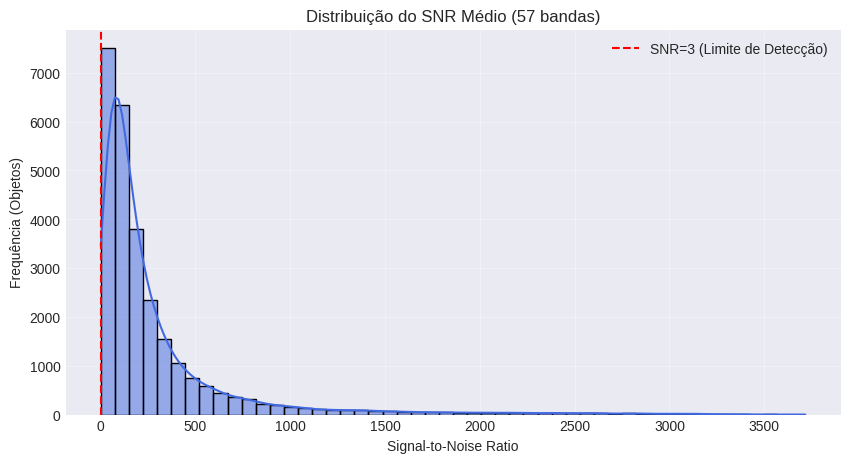

Processamento concluído com sucesso!
O DataFrame de SNR agora contém 64 colunas (IDs + 57 bandas + estatísticas).


In [149]:
# 1. Carregamento dos Dados
path_dir = '/content/drive/MyDrive/Notebook fotometrias/'

# Recarregar df_err_flux a partir do CSV processado.
# Este DataFrame terá colunas como 'uJAVA', 'J0378', etc., que já são numéricas.
df_err_flux = pd.read_csv(os.path.join(path_dir, 'df_erro_fluxo_processado.csv'))

print(f"Total de objetos carregados: {len(df_err_flux)}")

# --- INÍCIO DA IMPLEMENTAÇÃO DO SNR ---

# 2. Identificar as colunas que contêm os valores de erro do fluxo
# Precisamos obter os nomes dos filtros, que estão armazenados na variável 'filter_names' da execução anterior.
# Para garantir a robustez, recarregaremos df_filters para assegurar que filter_names esteja preenchido corretamente.
df_filters = pd.read_csv(os.path.join(path_dir, 'filters_names.csv'))
filter_names = df_filters['name'].tolist()

print("Convertendo erros relativos e calculando SNR...")

# A função get_snr_matrix não é adequada porque 'FLUX_RELERR_APER_COR_3_0' não existe mais em df_err_flux,
# e os valores de erro já estão divididos em colunas numéricas individuais.

# Seleciona apenas as colunas de filtro de df_err_flux para o cálculo da relação sinal-ruído (SNR)
error_columns_df = df_err_flux[filter_names]

# Calcular SNR para cada elemento no DataFrame error_columns_df
# SNR = 1 / Erro_Relativo
# np.where evita a divisão por zero quando o erro é 0.0
with np.errstate(divide='ignore', invalid='ignore'):
    snr_calculated_values = error_columns_df.apply(lambda x: np.where(x > 0, 1.0 / x, 0.0))

# 3. Integração ao DataFrame Principal (Separando por objeto/banda)
# Crie novos nomes de coluna para os valores de SNR, por exemplo, 'SNR_uJAVA', 'SNR_J0378'
bandas_snr_names = [f'SNR_{name}' for name in filter_names]

# Cria um novo DataFrame para SNR com nomes de coluna apropriados
df_snr = pd.DataFrame(snr_calculated_values.values, columns=bandas_snr_names)

# Adiciona os IDs originais (TILE_ID e NUMBER) e outros metadados relevantes de df_err_flux
df_snr.insert(0, 'TILE_ID', df_err_flux['TILE_ID'].values)
df_snr.insert(1, 'NUMBER', df_err_flux['NUMBER'].values)
df_snr['Plx'] = df_err_flux['Plx'].values
df_snr['e_Plx'] = df_err_flux['e_Plx'].values
df_snr['erro_relativo_paralaxe'] = df_err_flux['erro_relativo_paralaxe'].values

# --- FIM DA IMPLEMENTAÇÃO DO SNR ---

# 4. Cálculo de Estatísticas de Qualidade (Sugestão para seu dashboard)
df_snr['SNR_MEDIO'] = df_snr[bandas_snr_names].mean(axis=1)
df_snr['SNR_MAX'] = df_snr[bandas_snr_names].max(axis=1)

# 5. Visualização de Controle (Dashboard Simples)
plt.figure(figsize=(10, 5))
sns.histplot(df_snr['SNR_MEDIO'], bins=50, kde=True, color='royalblue')
plt.title('Distribuição do SNR Médio (57 bandas)')
plt.xlabel('Signal-to-Noise Ratio')
plt.ylabel('Frequência (Objetos)')
plt.axvline(x=3, color='red', linestyle='--', label='SNR=3 (Limite de Detecção)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 6. Salvando o Processamento Final
output_file = os.path.join(path_dir, 'DF_PROCESSADO_COM_SNR.csv')
df_snr.to_csv(output_file, index=False)

print(f"Processamento concluído com sucesso!")
print(f"O DataFrame de SNR agora contém {df_snr.shape[1]} colunas (IDs + 57 bandas + estatísticas).")


=== EXPLORADOR DE BANDAS J-PAS ===
Bandas disponíveis: 1 a 59
O que você deseja analisar?
- Digite os números (ex: 7, 39, 45)
- Digite 'todas' para ver o painel completo
- Digite 'aleatorias 5' ou 'aleatorias 10' para amostragem
Sua escolha: 
aleatorias 5

Processando 5 banda(s)...


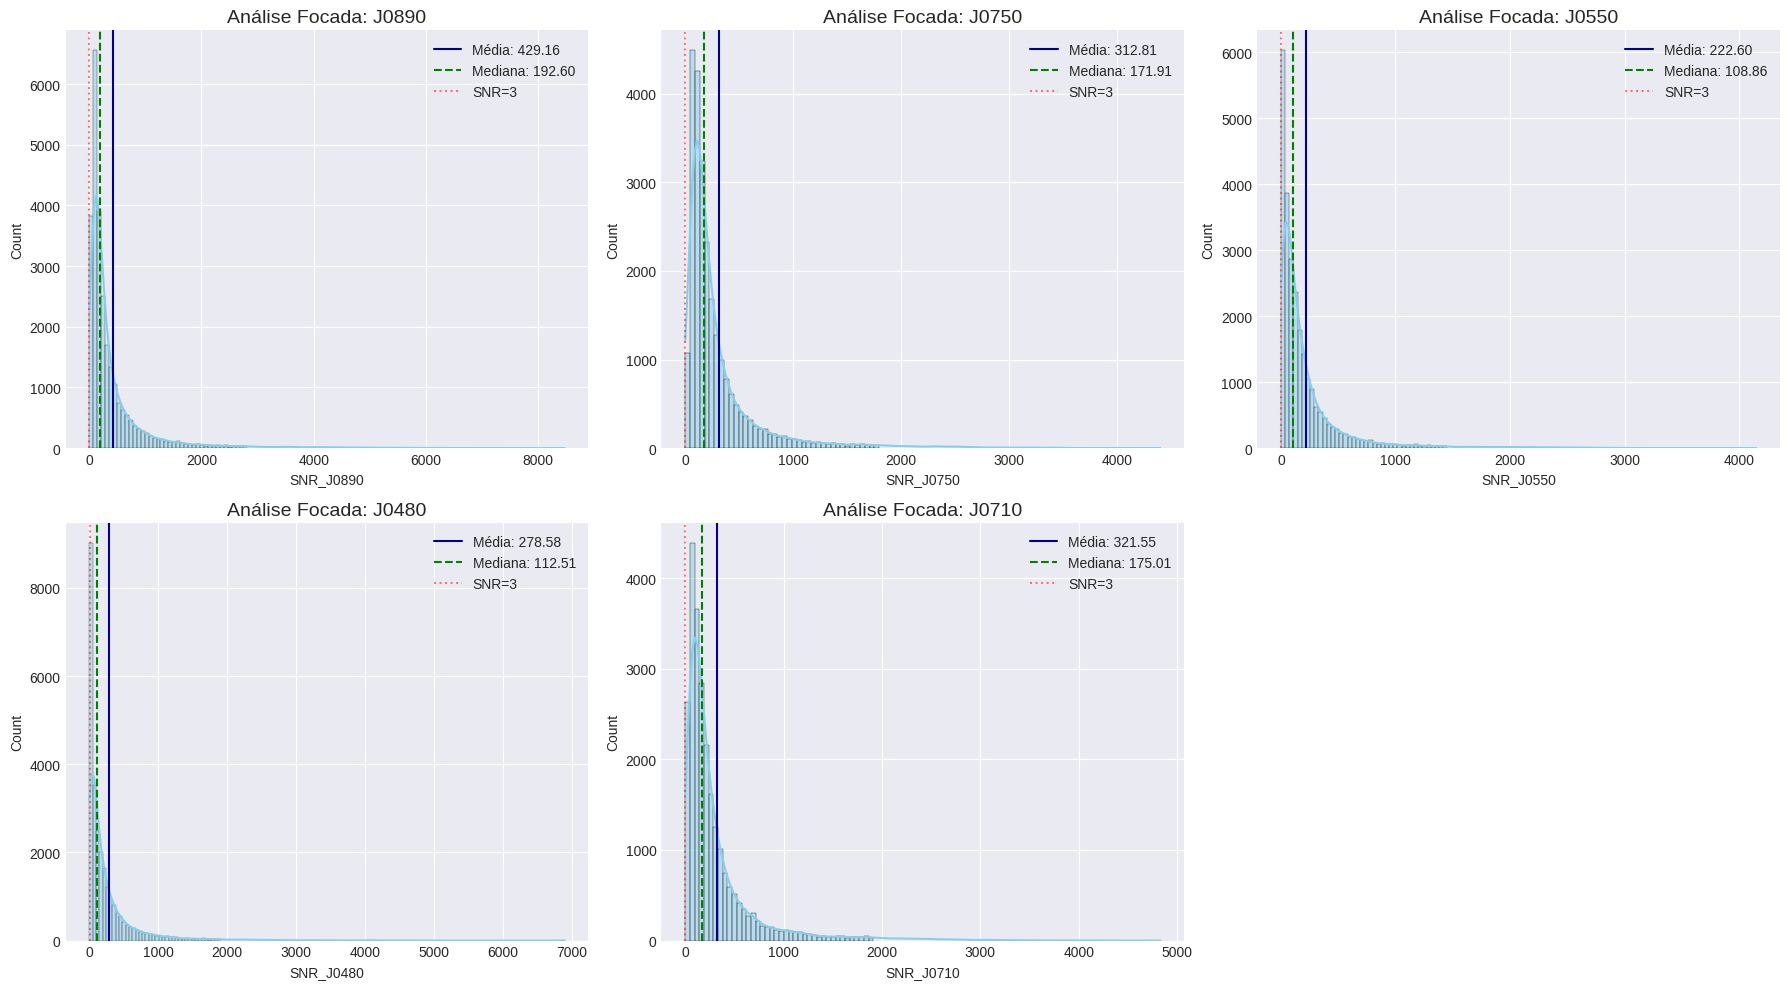


RELATÓRIO ESTATÍSTICO DAS BANDAS SELECIONADAS
          SNR_J0890    SNR_J0750    SNR_J0550    SNR_J0480    SNR_J0710
min        1.259533     1.551516     0.249027     0.099533     0.930064
max     8474.576271  4405.286344  4149.377593  6896.551724  4830.917874
mean     429.163416   312.812400   222.595286   278.575407   321.546743
median   192.604006   171.909919   108.861311   112.511251   175.008750
std      682.212203   418.006893   351.340618   492.925146   442.793493


In [155]:
# --- 1. Preparação dos Dados (SNR já calculado anteriormente) ---
# Caso df_snr não esteja na memória, ele deve ser gerado a partir do df_err_flux
# CORRECTED: Get actual SNR column names from the df_snr DataFrame
bandas_cols = [col for col in df_snr.columns if col.startswith('SNR_')]

# --- 2. Função de Captura de Input com Timeout ---
def get_user_input(prompt, timeout):
    print(prompt)
    user_resp = [None] # Usar lista para persistência fora da thread

    def interact():
        user_resp[0] = input()

    thread = threading.Thread(target=interact)
    thread.daemon = True
    thread.start()
    thread.join(timeout)

    if thread.is_alive():
        print(f"\n[Tempo esgotado!] O usuário não respondeu em {timeout}s. Selecionando 3 bandas aleatórias...")
        return "random_3"
    return user_resp[0]

# --- 3. Interface de Interatividade ---
print("\n=== EXPLORADOR DE BANDAS J-PAS ===")
print(f"Bandas disponíveis: 1 a {len(bandas_cols)}") # Adjusted to show actual number of bands

prompt_text = (
    "O que você deseja analisar?\n"
    "- Digite os números (ex: 7, 39, 45)\n"
    "- Digite 'todas' para ver o painel completo\n"
    "- Digite 'aleatorias 5' ou 'aleatorias 10' para amostragem\n"
    "Sua escolha: "
)

escolha = get_user_input(prompt_text, 300) # 300 segundos = 5 minutos

# --- 4. Lógica de Seleção ---
if escolha is None or escolha == "random_3":
    selecionadas = random.sample(bandas_cols, 3)
elif escolha.lower() == 'todas':
    selecionadas = bandas_cols
elif 'aleatorias' in escolha.lower():
    n = int(escolha.split()[-1])
    selecionadas = random.sample(bandas_cols, min(n, len(bandas_cols))) # Adjusted to use actual number of bands
else:
    # Converte string "45, 7, 39" em lista de nomes de colunas
    # CORRECTED: Map input indices to actual band names from bandas_cols
    indices = []
    for part in escolha.replace(',', ' ').split():
        part = part.strip()
        if part.isdigit():
            idx = int(part) - 1
            if 0 <= idx < len(bandas_cols):
                indices.append(bandas_cols[idx])
    selecionadas = indices

# --- 5. Plotagem e Relatório Detalhado ---
if selecionadas:
    print(f"\nProcessando {len(selecionadas)} banda(s)...")

    # Configuração de subplots
    n_sel = len(selecionadas)
    n_cols = 3 if n_sel > 3 else n_sel
    n_rows = (n_sel + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), squeeze=False)
    axes_flat = axes.flatten()

    stats_list = []

    for i, col in enumerate(selecionadas):
        ax = axes_flat[i]
        dados = df_snr[col][df_snr[col] > 0].dropna()

        # Estatísticas
        desc = dados.describe()
        stats_list.append(desc)

        # Plot
        limite = np.percentile(dados, 98) if not dados.empty else 100
        sns.histplot(dados, bins=40, ax=ax, color='skyblue', kde=True, binrange=(0, limite))

        # Linhas de Média e Mediana
        mean_v = desc['mean']
        median_v = desc['50%']
        ax.axvline(mean_v, color='darkblue', linestyle='-', label=f'Média: {mean_v:.2f}')
        ax.axvline(median_v, color='green', linestyle='--', label=f'Mediana: {median_v:.2f}')
        ax.axvline(3, color='red', linestyle=':', alpha=0.5, label='SNR=3')

        # Corrected title to use actual band name
        band_display_name = col.replace('SNR_', '')
        ax.set_title(f'Análise Focada: {band_display_name}', fontsize=14)
        ax.legend()

    # Remover eixos extras
    # Corrected loop for removing extra axes
    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    plt.tight_layout()
    plt.show()

    # --- 6. Relatório Detalhado ---
    print("\n" + "="*50)
    print("RELATÓRIO ESTATÍSTICO DAS BANDAS SELECIONADAS")
    print("="*50)
    df_stats = pd.concat(stats_list, axis=1)
    # Adicionando desvio padrão explicitamente se não estiver no describe
    print(df_stats.loc[['min', 'max', 'mean', '50%', 'std']].rename(index={'50%': 'median'}))
    print("="*50)

else:
    print("Nenhuma banda válida foi selecionada.")


# EM TESTE

### **4.4 Histograma do sinal/ruído de cada banda**

FASE 3: Visualização dos Dados, tenta a primeira abordagem de visualização: plotar os histogramas de SNR para todas as 57 bandas (excluindo iSDSS ) em um grande painel de subplots. O resultado, embora completo, é visualmente poluído e difícil de inspecionar individualmente.

Interatividade: O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
Robustez: Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
Análise Focada: Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
Relatório Detalhado: Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.
Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)

### V**ISUALIZAÇÃO COM ESCALA ADAPTATIVA**

### **Visualização Comparativa e Sumarização**

Para complementar a análise focada, o bloco a seguir oferece duas visualizações globais:

Boxplots (Visualização Alternativa): O primeiro gráfico é um boxplot da distribuição de SNR para todas as bandas, lado a lado. Esta é uma ferramenta visual superior aos 56 histogramas, pois permite uma comparação direta das medianas (centro da caixa), da dispersão (tamanho da caixa) e dos outliers (pontos) entre as diferentes bandas.
Estatísticas Resumidas: Finalmente, o código calcula as estatísticas descritivas do SNR para todas as bandas e as armazena em um novo DataFrame, snr_stats_df. A impressão desta tabela é o produto final quantitativo da análise, resumindo o desempenho de cada filtro fotométrico.

### **SALVANDO TODOS OS RESULTADOS**